### Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

A seller join Olist through a marketing and sales funnel that was made public at this dataset. Description of steps:

Sign-up at a landing page.
Get contacted by a Sales development Representative (SDR), confirm some information and schedule a consultancy.
Consultancy is made by a Sales Representative (SR). The SR may close the deal (lead sing up) or lose the deal (led leaves without sign in)
Lead becomes a seller and starts building his catalog on Olist.
His products are published on marketplaces and ready to sell!
Attention
A seller MQL might come from multiple sources (he might subscribe on two different landing pages, for instance).

### Questions for Analysis

1. Marketing channel effectivness
2. Total Money Made by Each Channels in Thousand
3. Money Made by Marketing Channels in Thousand Over Time
4. Revenue Over Months in Thousands
5. Average Time until Buy
6. Sales Count per Month 
7. Business Segment for Each lead profile
8. Who orders more?
9. Who pays more?
10. Which type makes more money?

### Table of Contents

- Data wrangling and cleaning
    - Working on "closed_deals" cleaning
    - "closed_deals" final look
    - Working on "marketing_qualified_leads" cleaning
    - "marketing_qualified_leads" final looks
- Data preparing for funnel analysis
- EDA
- Marketing Funnel Report and Story

In [1]:
import pandas as pd
import plotly.express as ex
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})

%matplotlib inline

C:\Users\Mauricio\AppData\Local\Temp\ipykernel_2680\2352370335.py:9: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#Import closed_deals, and marketing_qualified_leads Data
cd = pd.read_csv("olist_closed_deals_dataset.csv")
mql = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")

### Working on "closed_deals" cleaning

In [3]:
cd.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [4]:
# Quick overview on data
cd.info()
cd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


In [5]:
# convert "won_date" column to date_time column
cd["won_date"] = pd.to_datetime(cd["won_date"])

In [6]:
#drop unused columns
cd.drop(columns=["has_company", "has_gtin","average_stock","declared_product_catalog_size","seller_id","sdr_id","sr_id"]\
        ,axis=1 \
        ,inplace=True
       )

In [7]:
#Count the null values
cd.isnull().sum()

mql_id                        0
won_date                      0
business_segment              1
lead_type                     6
lead_behaviour_profile      177
business_type                10
declared_monthly_revenue      0
dtype: int64

In [8]:
#fill null with "unknown"
cd.fillna("Unknown",inplace=True)

In [9]:
#No duplicated rows
cd.duplicated().sum()

0

In [10]:
#check duplicated in each column

for i in cd.columns:
    print(i, cd[i].duplicated().sum())

mql_id 0
won_date 18
business_segment 808
lead_type 833
lead_behaviour_profile 832
business_type 838
declared_monthly_revenue 815


In [11]:
cd[["mql_id","won_date"]].duplicated().sum()

0

no duplicated full rows or at the "mql_id" column and that's what we need 

In [12]:
cd.head()

,mql_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,2018-05-08 20:17:59,car_accessories,industry,eagle,reseller,0.0
2,327174d3648a2d047e8940d7d15204ca,2018-06-05 17:27:23,home_appliances,online_big,cat,reseller,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,2018-01-17 13:51:03,food_drink,online_small,Unknown,reseller,0.0
4,ffe640179b554e295c167a2f6be528e0,2018-07-03 20:17:45,home_appliances,industry,wolf,manufacturer,0.0


In [13]:
cd.info()
cd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    842 non-null    object        
 1   won_date                  842 non-null    datetime64[ns]
 2   business_segment          842 non-null    object        
 3   lead_type                 842 non-null    object        
 4   lead_behaviour_profile    842 non-null    object        
 5   business_type             842 non-null    object        
 6   declared_monthly_revenue  842 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 46.2+ KB


,declared_monthly_revenue
count,8.420000e+02
mean,7.337768e+04
std,1.744799e+06
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,5.000000e+07


### Working on "marketing_qualified_leads"cleaning

In [14]:
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [15]:
mql.info()
mql.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [16]:
#Convert "first_contact_date" column to date_tim column
mql["first_contact_date"] = pd.to_datetime(mql["first_contact_date"])

In [17]:
# fill null with "unknown"
mql.fillna("unknown",inplace=True)

In [18]:
#no duplicated rows
mql.duplicated().sum()

0

In [19]:
#check duplicated in each column
for i in mql.columns:
    print(i,mql[i].duplicated().sum())

mql_id 0
first_contact_date 7664
landing_page_id 7505
origin 7990


In [20]:
mql[["mql_id","first_contact_date"]].duplicated().sum()

0

 No duplicated full rows, or at the "mql_id" column, that's good

### "marketing_quaified_leads" final look

In [21]:
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [22]:
mql.info()
mql.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              8000 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


C:\Users\Mauricio\AppData\Local\Temp\ipykernel_2680\1519112811.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,8000
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02 00:00:00,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296
first,NaN,2017-06-14 00:00:00,NaN,NaN
last,NaN,2018-05-31 00:00:00,NaN,NaN


### Data preparing for funnel analysis

In [23]:
# Merge the data to get all market funnel data

df = mql.merge(cd, how="left", on ="mql_id")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    8000 non-null   object        
 1   first_contact_date        8000 non-null   datetime64[ns]
 2   landing_page_id           8000 non-null   object        
 3   origin                    8000 non-null   object        
 4   won_date                  842 non-null    datetime64[ns]
 5   business_segment          842 non-null    object        
 6   lead_type                 842 non-null    object        
 7   lead_behaviour_profile    842 non-null    object        
 8   business_type             842 non-null    object        
 9   declared_monthly_revenue  842 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 687.5+ KB


,mql_id,first_contact_date,landing_page_id,origin,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaT,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaT,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaT,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaT,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    8000 non-null   object        
 1   first_contact_date        8000 non-null   datetime64[ns]
 2   landing_page_id           8000 non-null   object        
 3   origin                    8000 non-null   object        
 4   won_date                  842 non-null    datetime64[ns]
 5   business_segment          842 non-null    object        
 6   lead_type                 842 non-null    object        
 7   lead_behaviour_profile    842 non-null    object        
 8   business_type             842 non-null    object        
 9   declared_monthly_revenue  842 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 687.5+ KB


In [25]:
# convert the data to months

df["won_date"] = pd.to_datetime(df["won_date"]).dt.strftime("%Y-%m")
df["first_contact_date"] = pd.to_datetime(df["first_contact_date"]).dt.strftime("%Y-%m")

### EDA

### Marketing Channel Effectiveness

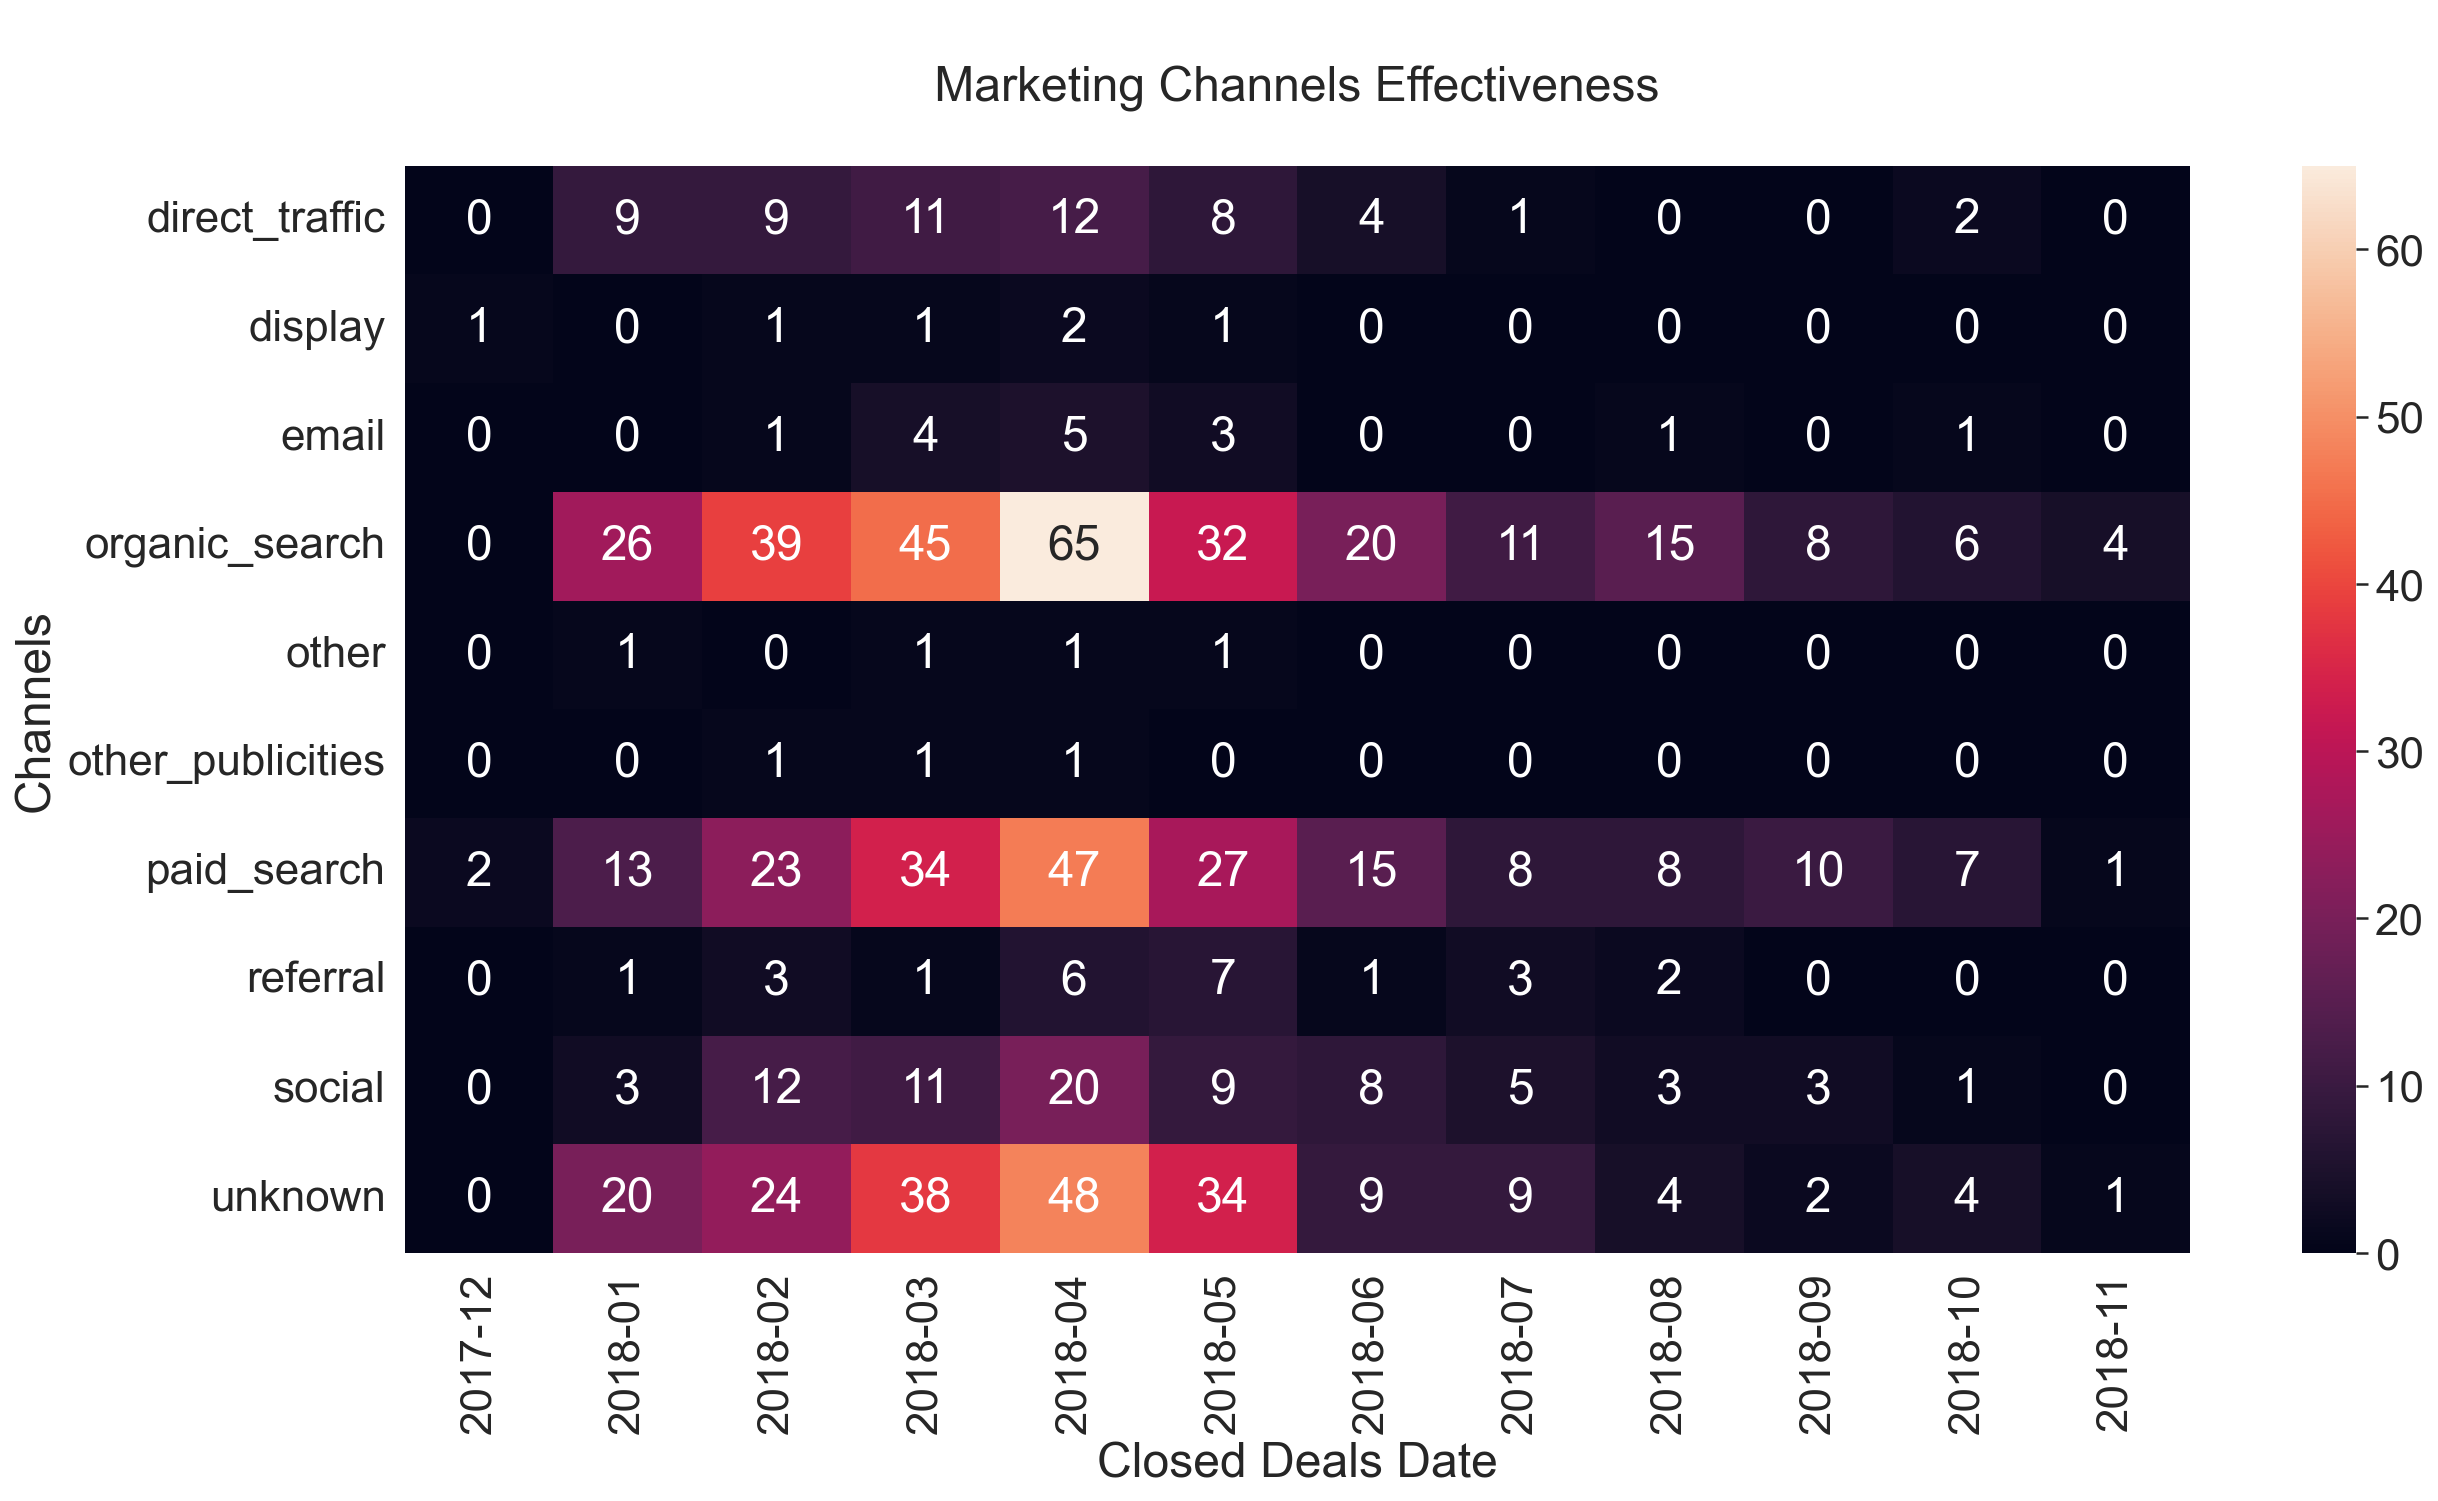

In [26]:
q1 = pd.pivot_table(df,
            index='origin',
            columns='won_date',
            values='declared_monthly_revenue',                            
            aggfunc='count',
            fill_value=0)

plt.figure(figsize=(20,10))
sns.set(font_scale=2);

sns.heatmap(q1, annot=True).set(title='\n Marketing Channels Effectiveness \n');

plt.xlabel("Closed Deals Date");
plt.ylabel("Channels");

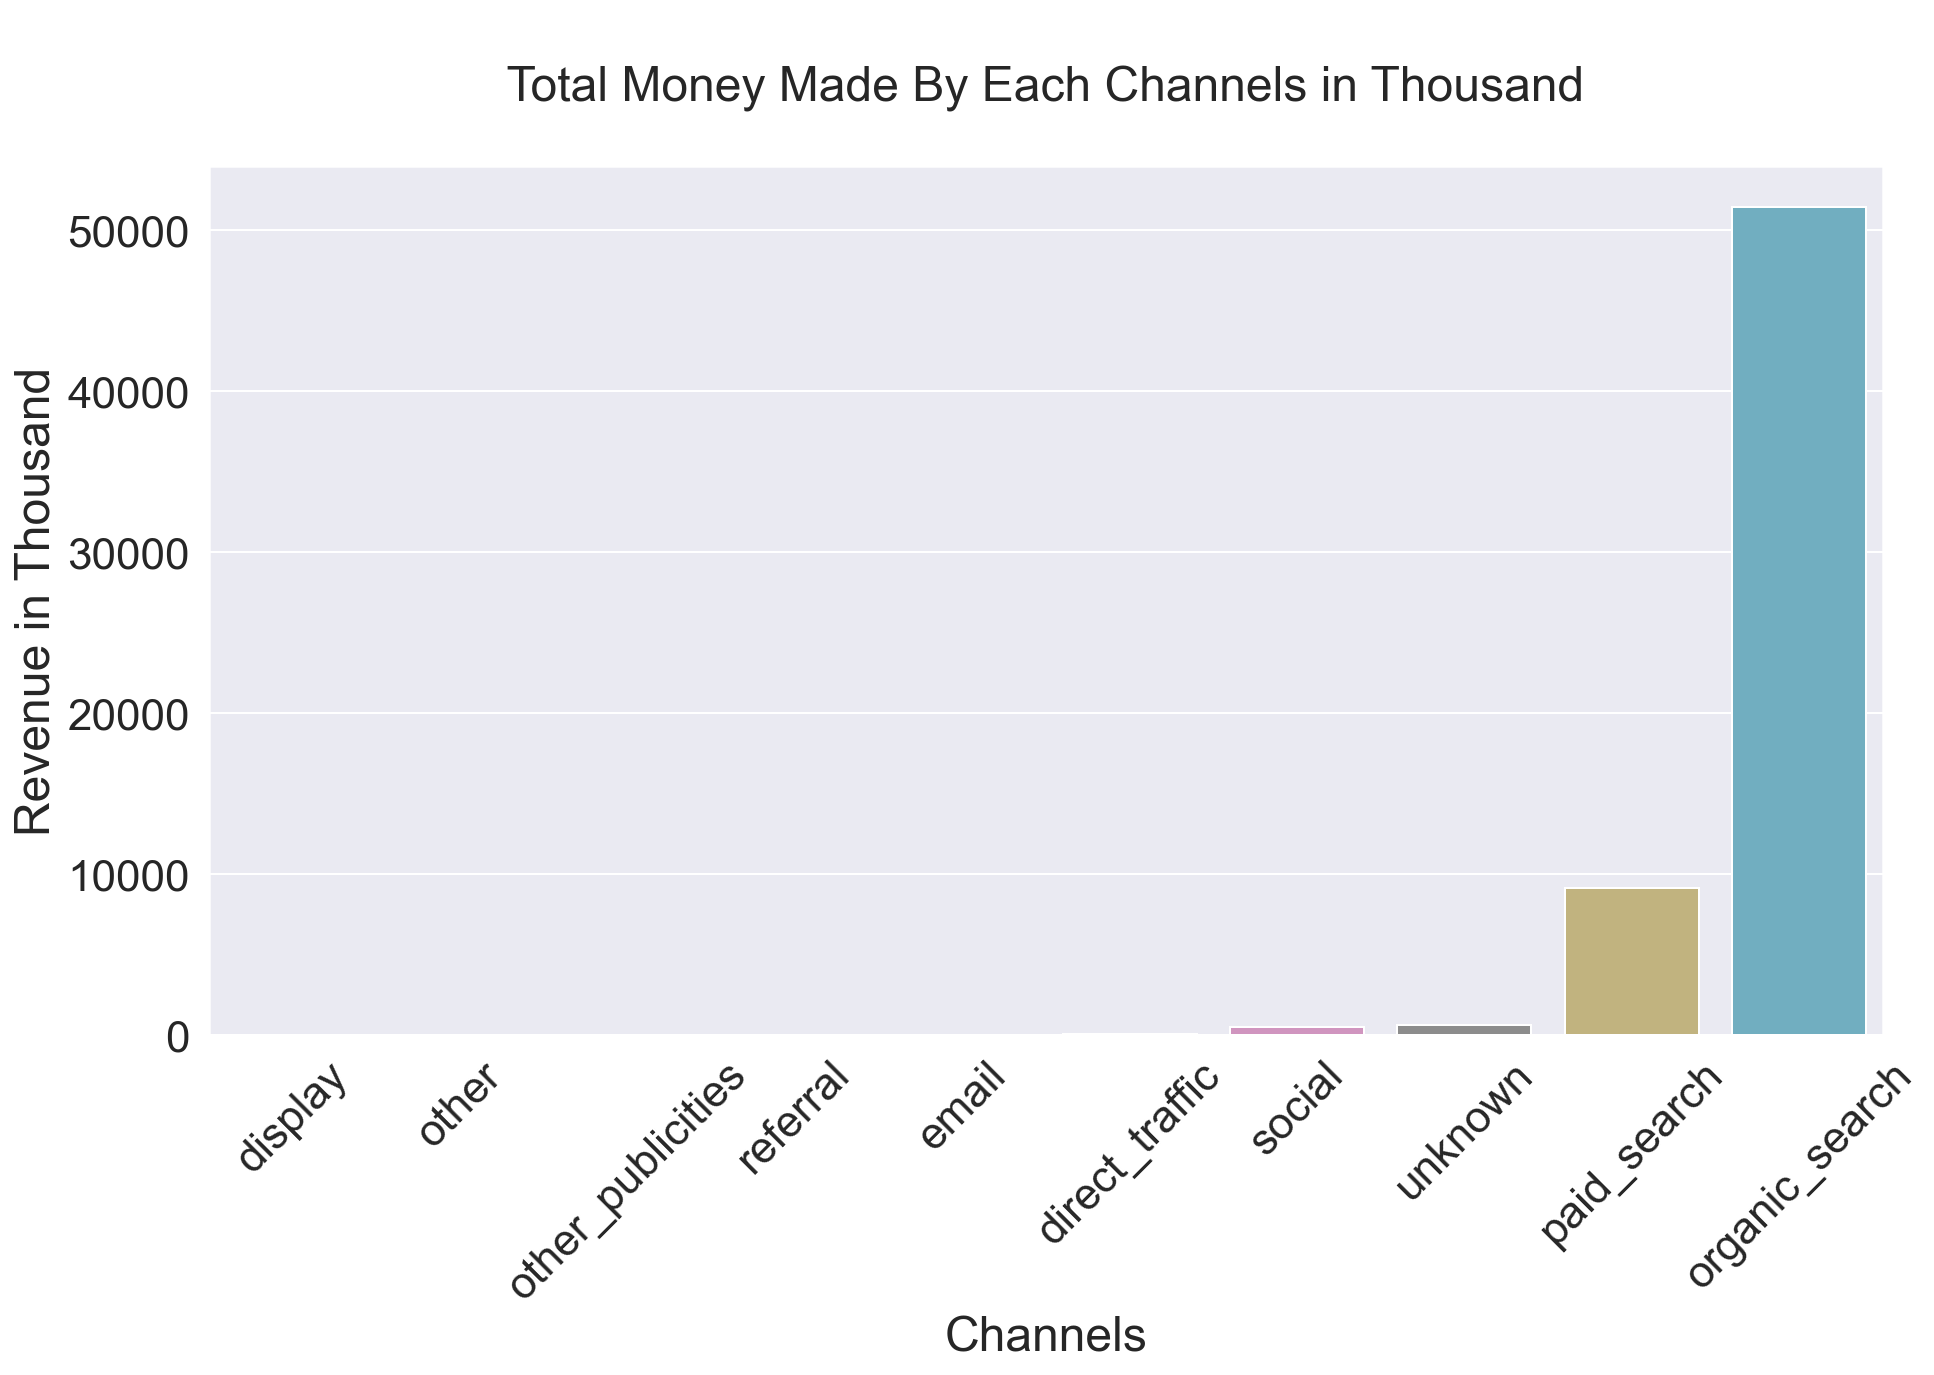

In [27]:
q2 = df.groupby('origin',as_index=False)["declared_monthly_revenue"].sum().\
                sort_values(by='declared_monthly_revenue')

q2['declared_monthly_revenue'] = q2['declared_monthly_revenue'] /1000

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)

sns.barplot(x='origin',
            y='declared_monthly_revenue',
            data=q2).set(title='\n Total Money Made By Each Channels in Thousand \n');

plt.ylabel("Revenue in Thousand");
plt.xlabel("Channels");

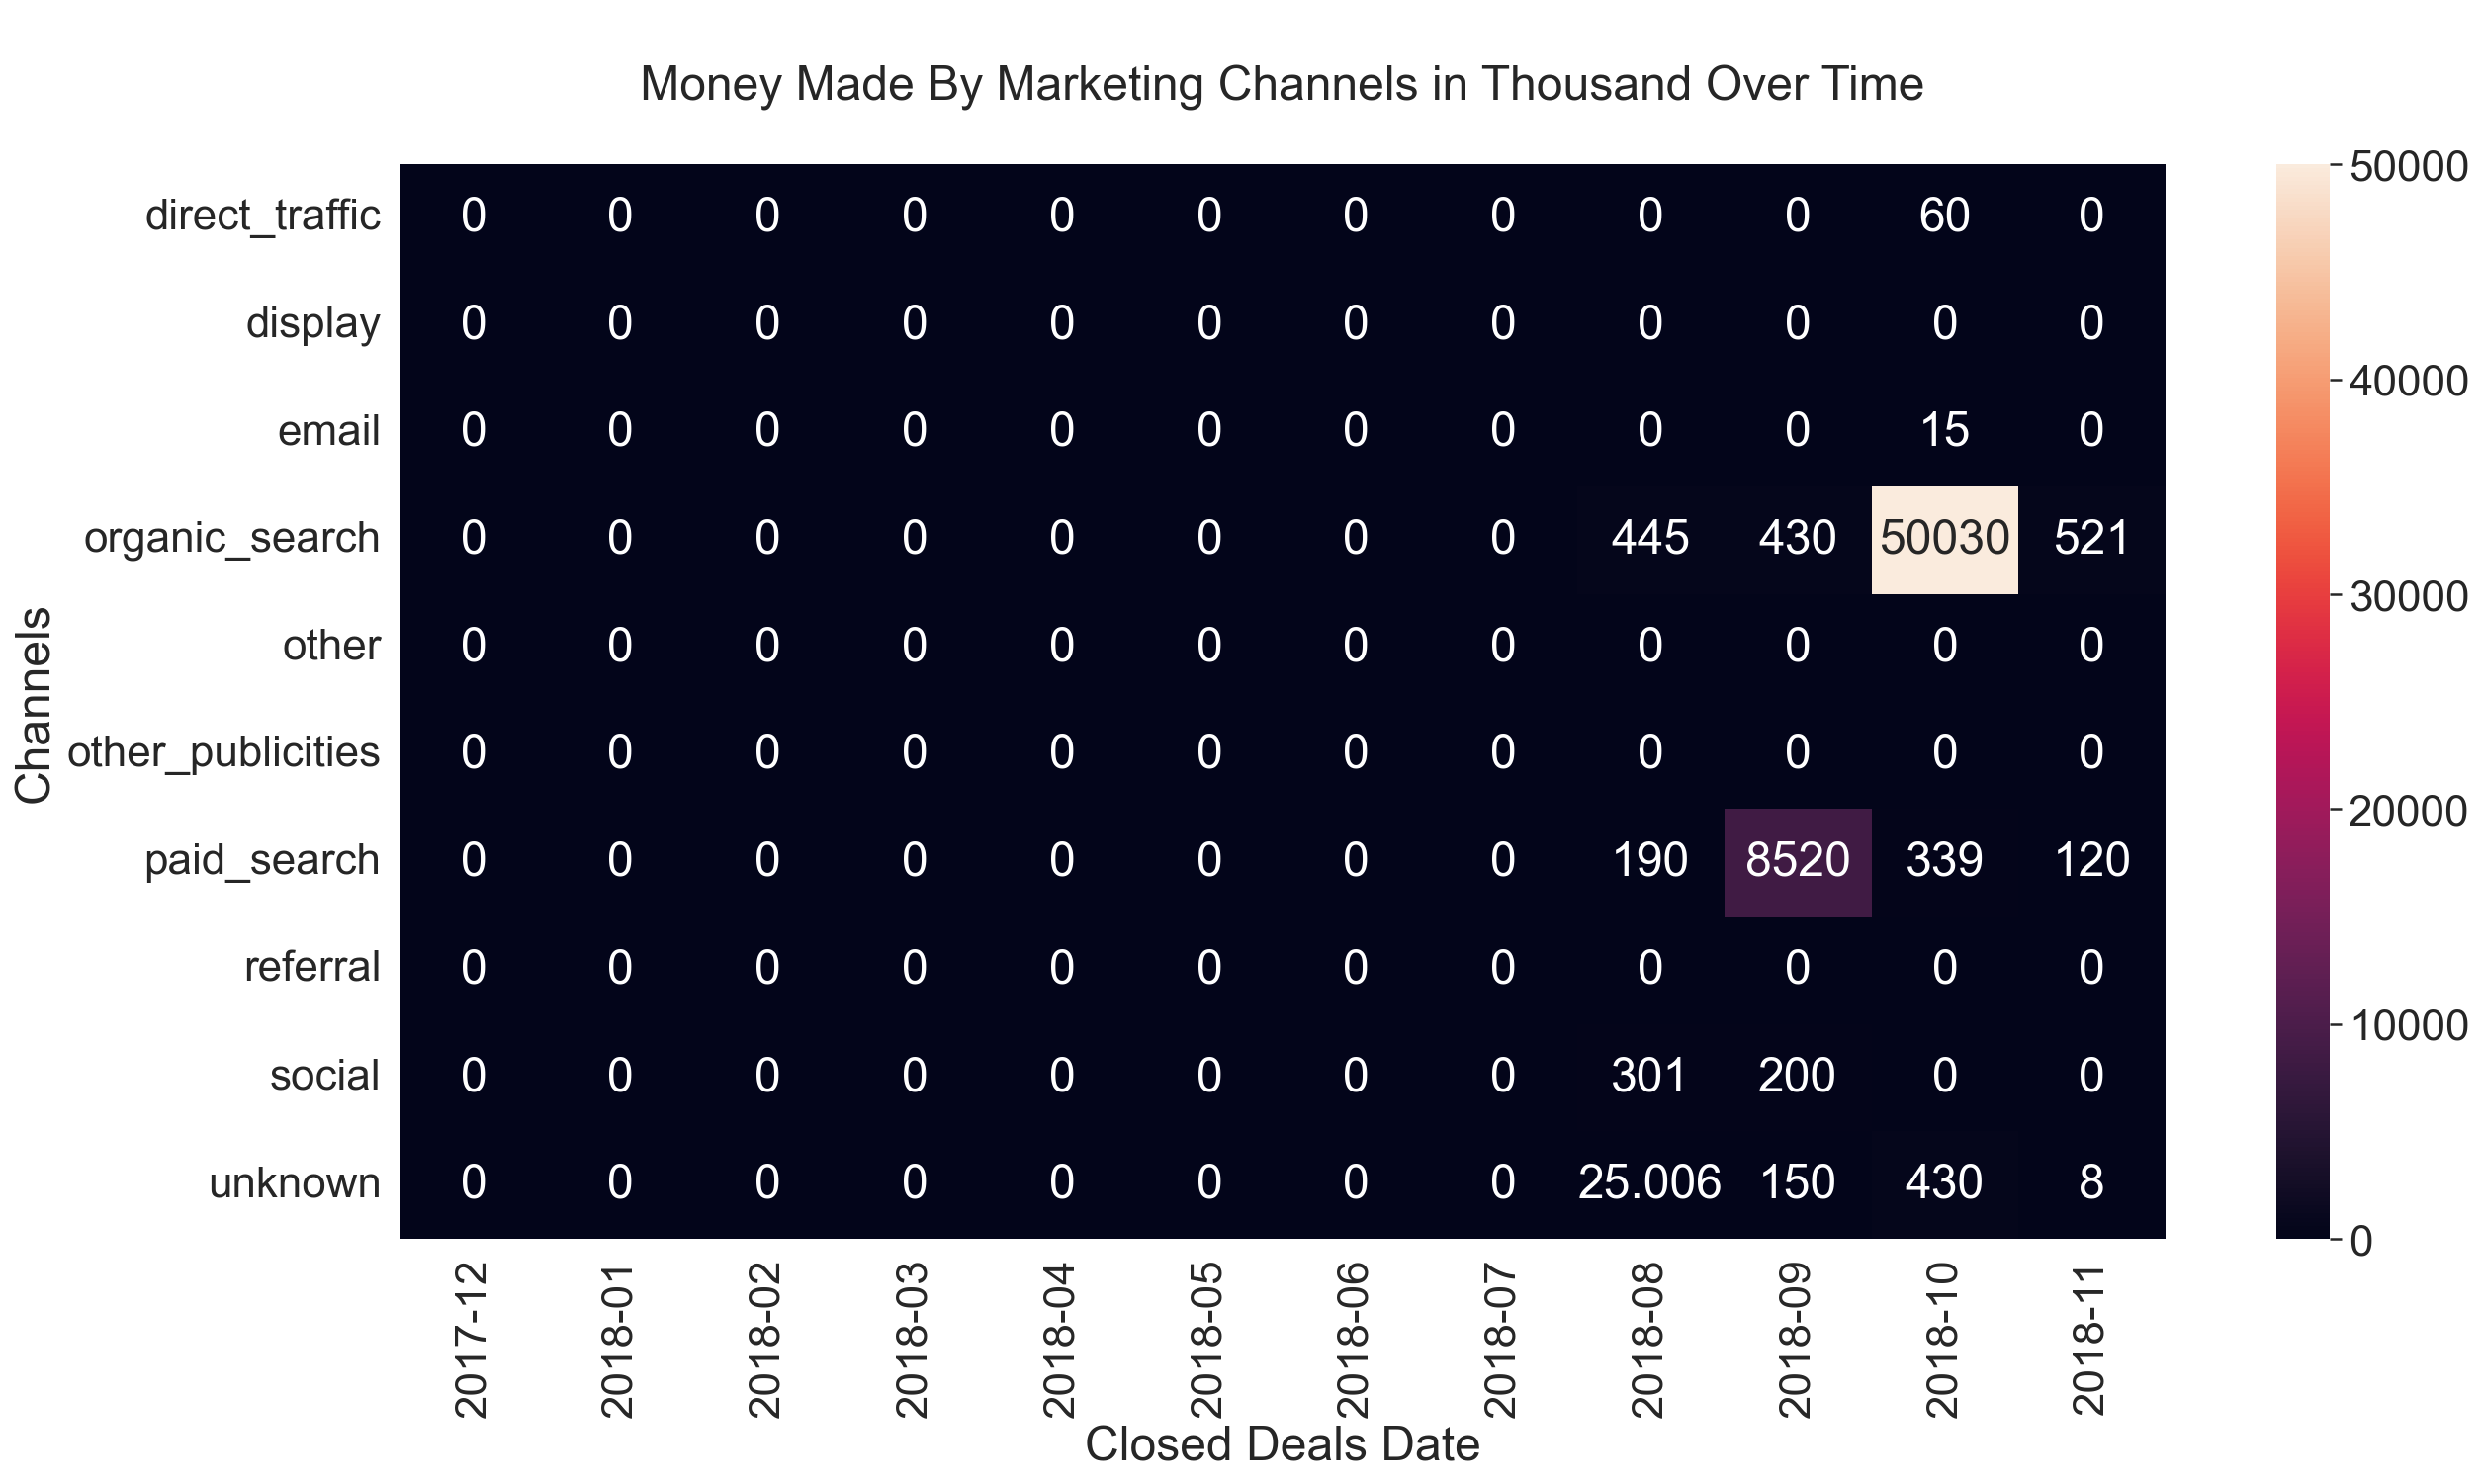

In [28]:
q3 = pd.pivot_table(df,
            index='origin',
            columns='won_date',
            values='declared_monthly_revenue',                            
            aggfunc='sum',
            fill_value=0)


plt.figure(figsize=(20,10));

sns.heatmap(q3/1000,
            annot=True,
            fmt='g',).set(title='\n Money Made By Marketing Channels in Thousand Over Time \n');

plt.xlabel("Closed Deals Date");
plt.ylabel("Channels");

### Final Marketing Channel Effectiveness Result:

1- organic_search is the first channel that attract customers, and make money for the website
2- paid_search is the second channel that attract customers, and make money for the website

### Sales Performance Overview

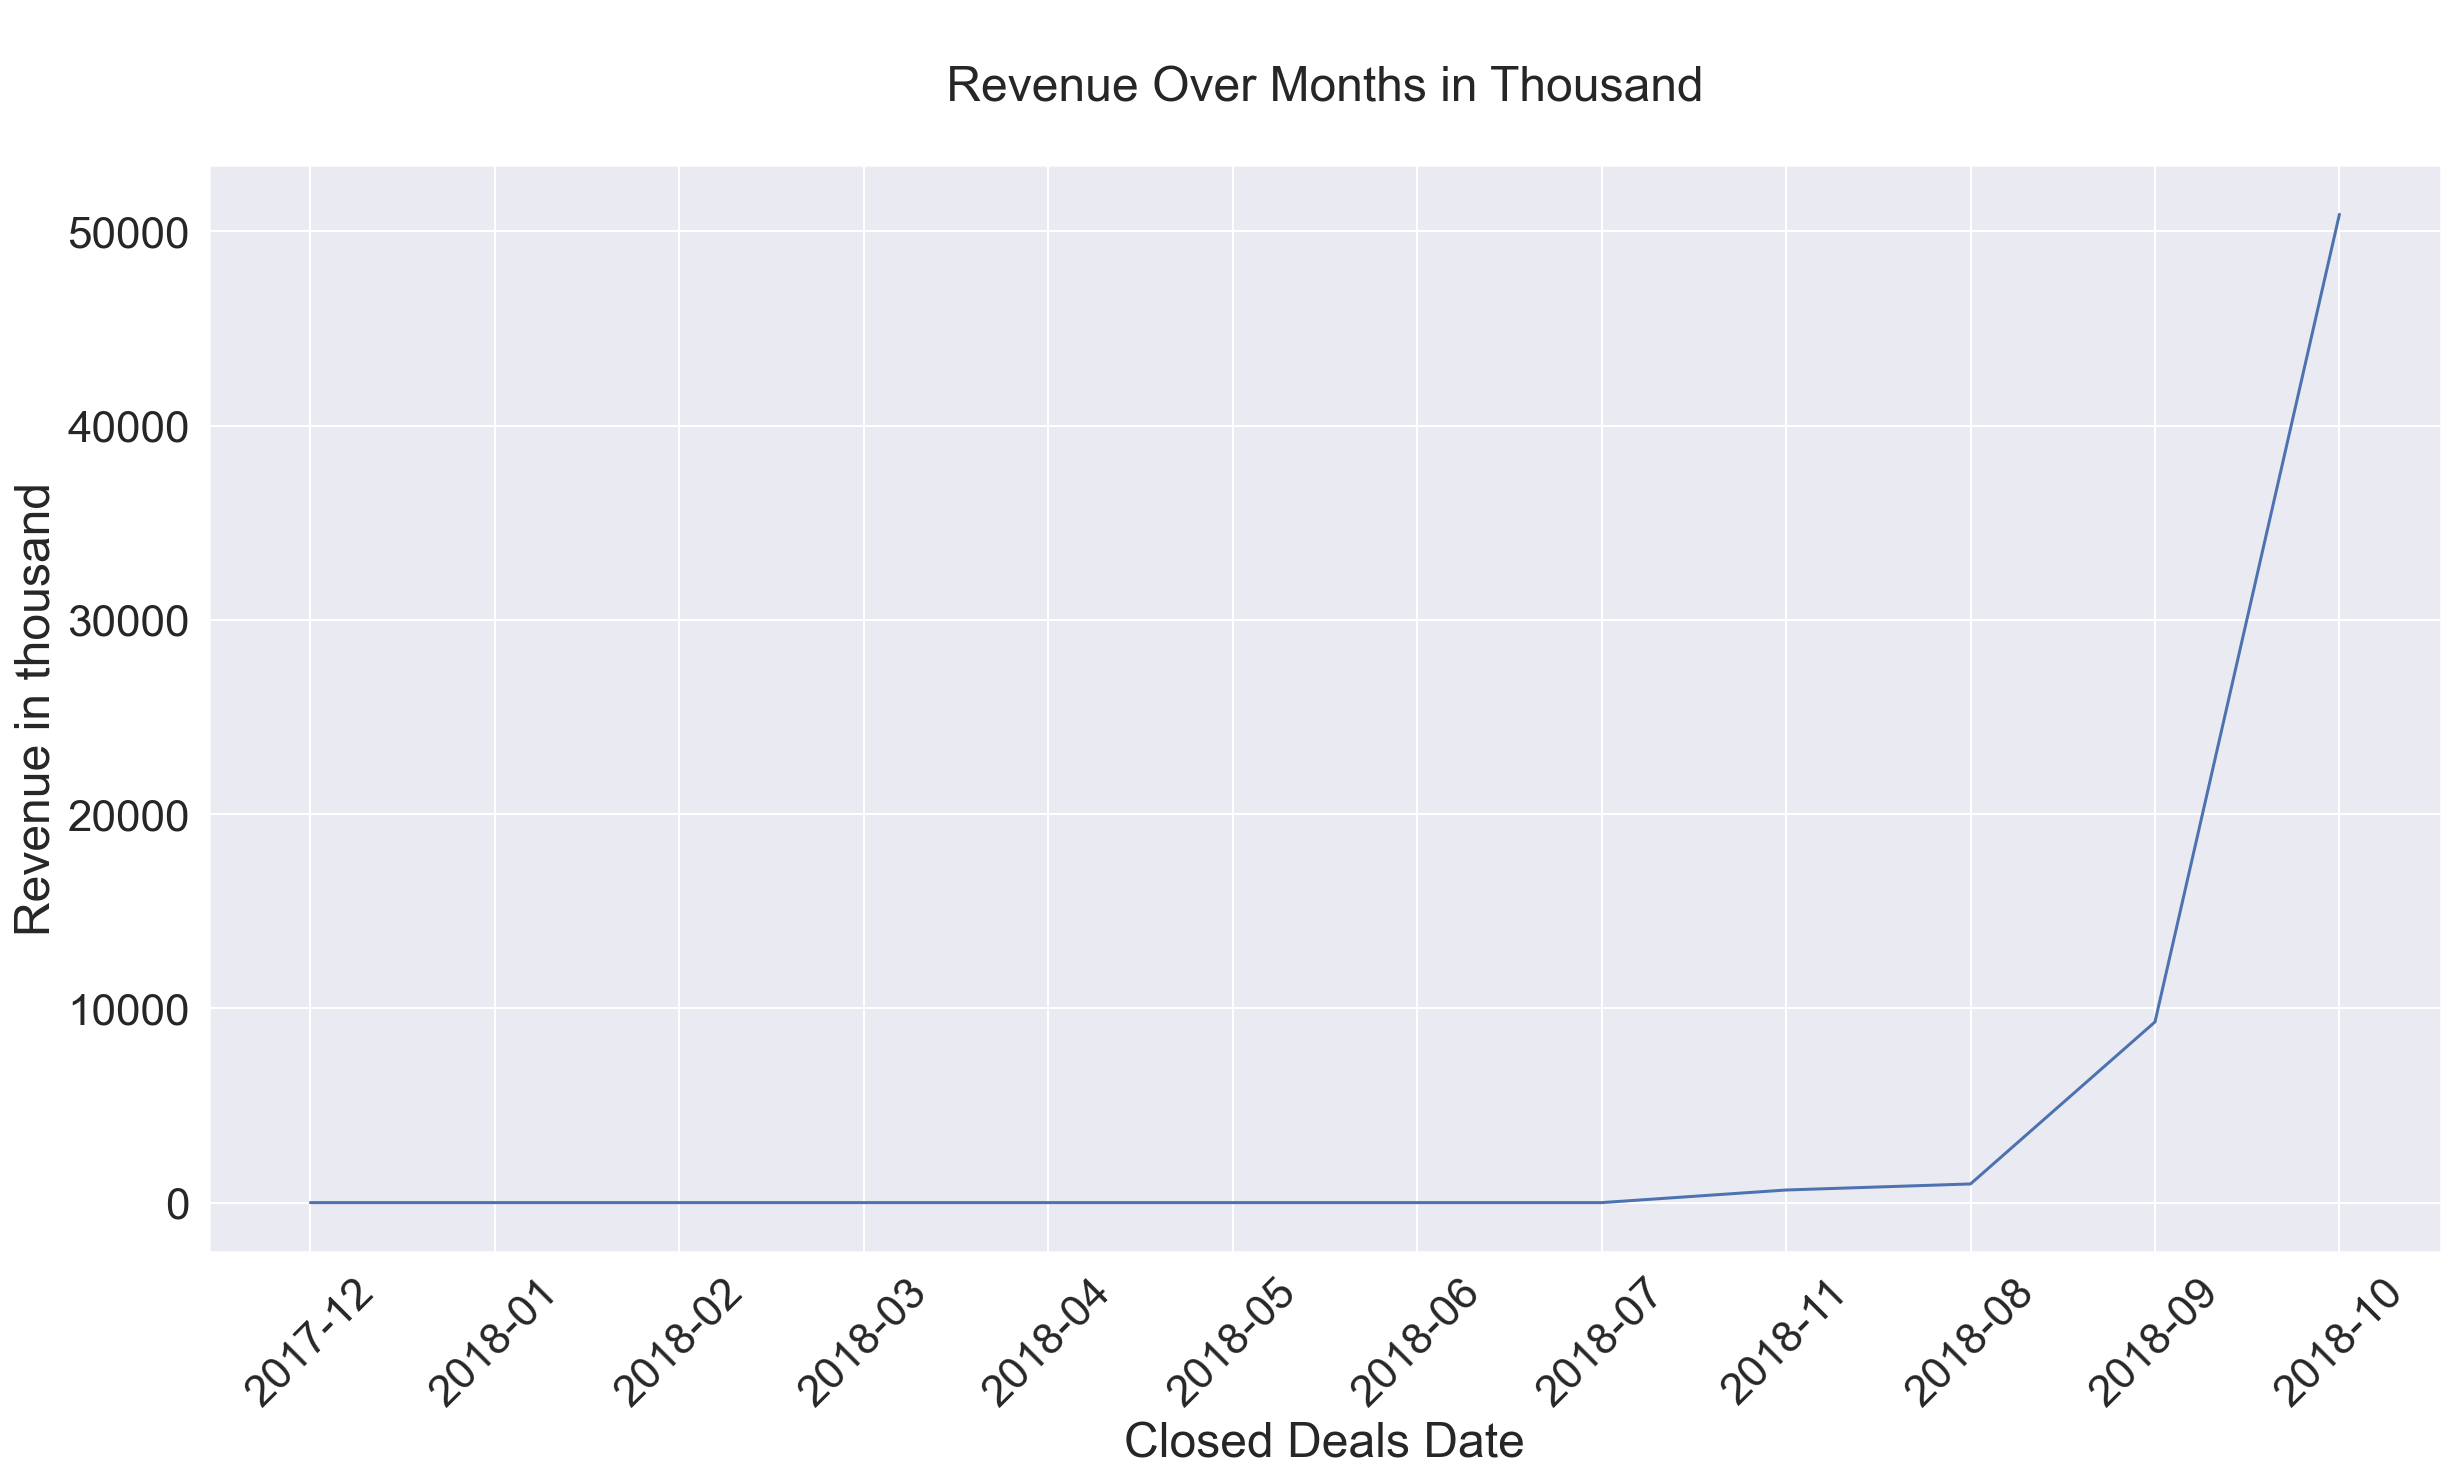

In [29]:
q4 = df.groupby('won_date',as_index=False)["declared_monthly_revenue"].sum().\
                sort_values(by='declared_monthly_revenue')

q4['declared_monthly_revenue'] = q4['declared_monthly_revenue'] /1000

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.xlabel("Closed Deals Date")
plt.ylabel("Revenue in thousand")

sns.lineplot(x='won_date',
             y='declared_monthly_revenue',
             data=q4).set(title='\n Revenue Over Months in Thousand \n');

In [30]:
df['dif']=(pd.to_datetime(df["won_date"]) - pd.to_datetime(df["first_contact_date"])).dt.days



 Average time between first sign up and buying = 47 Days


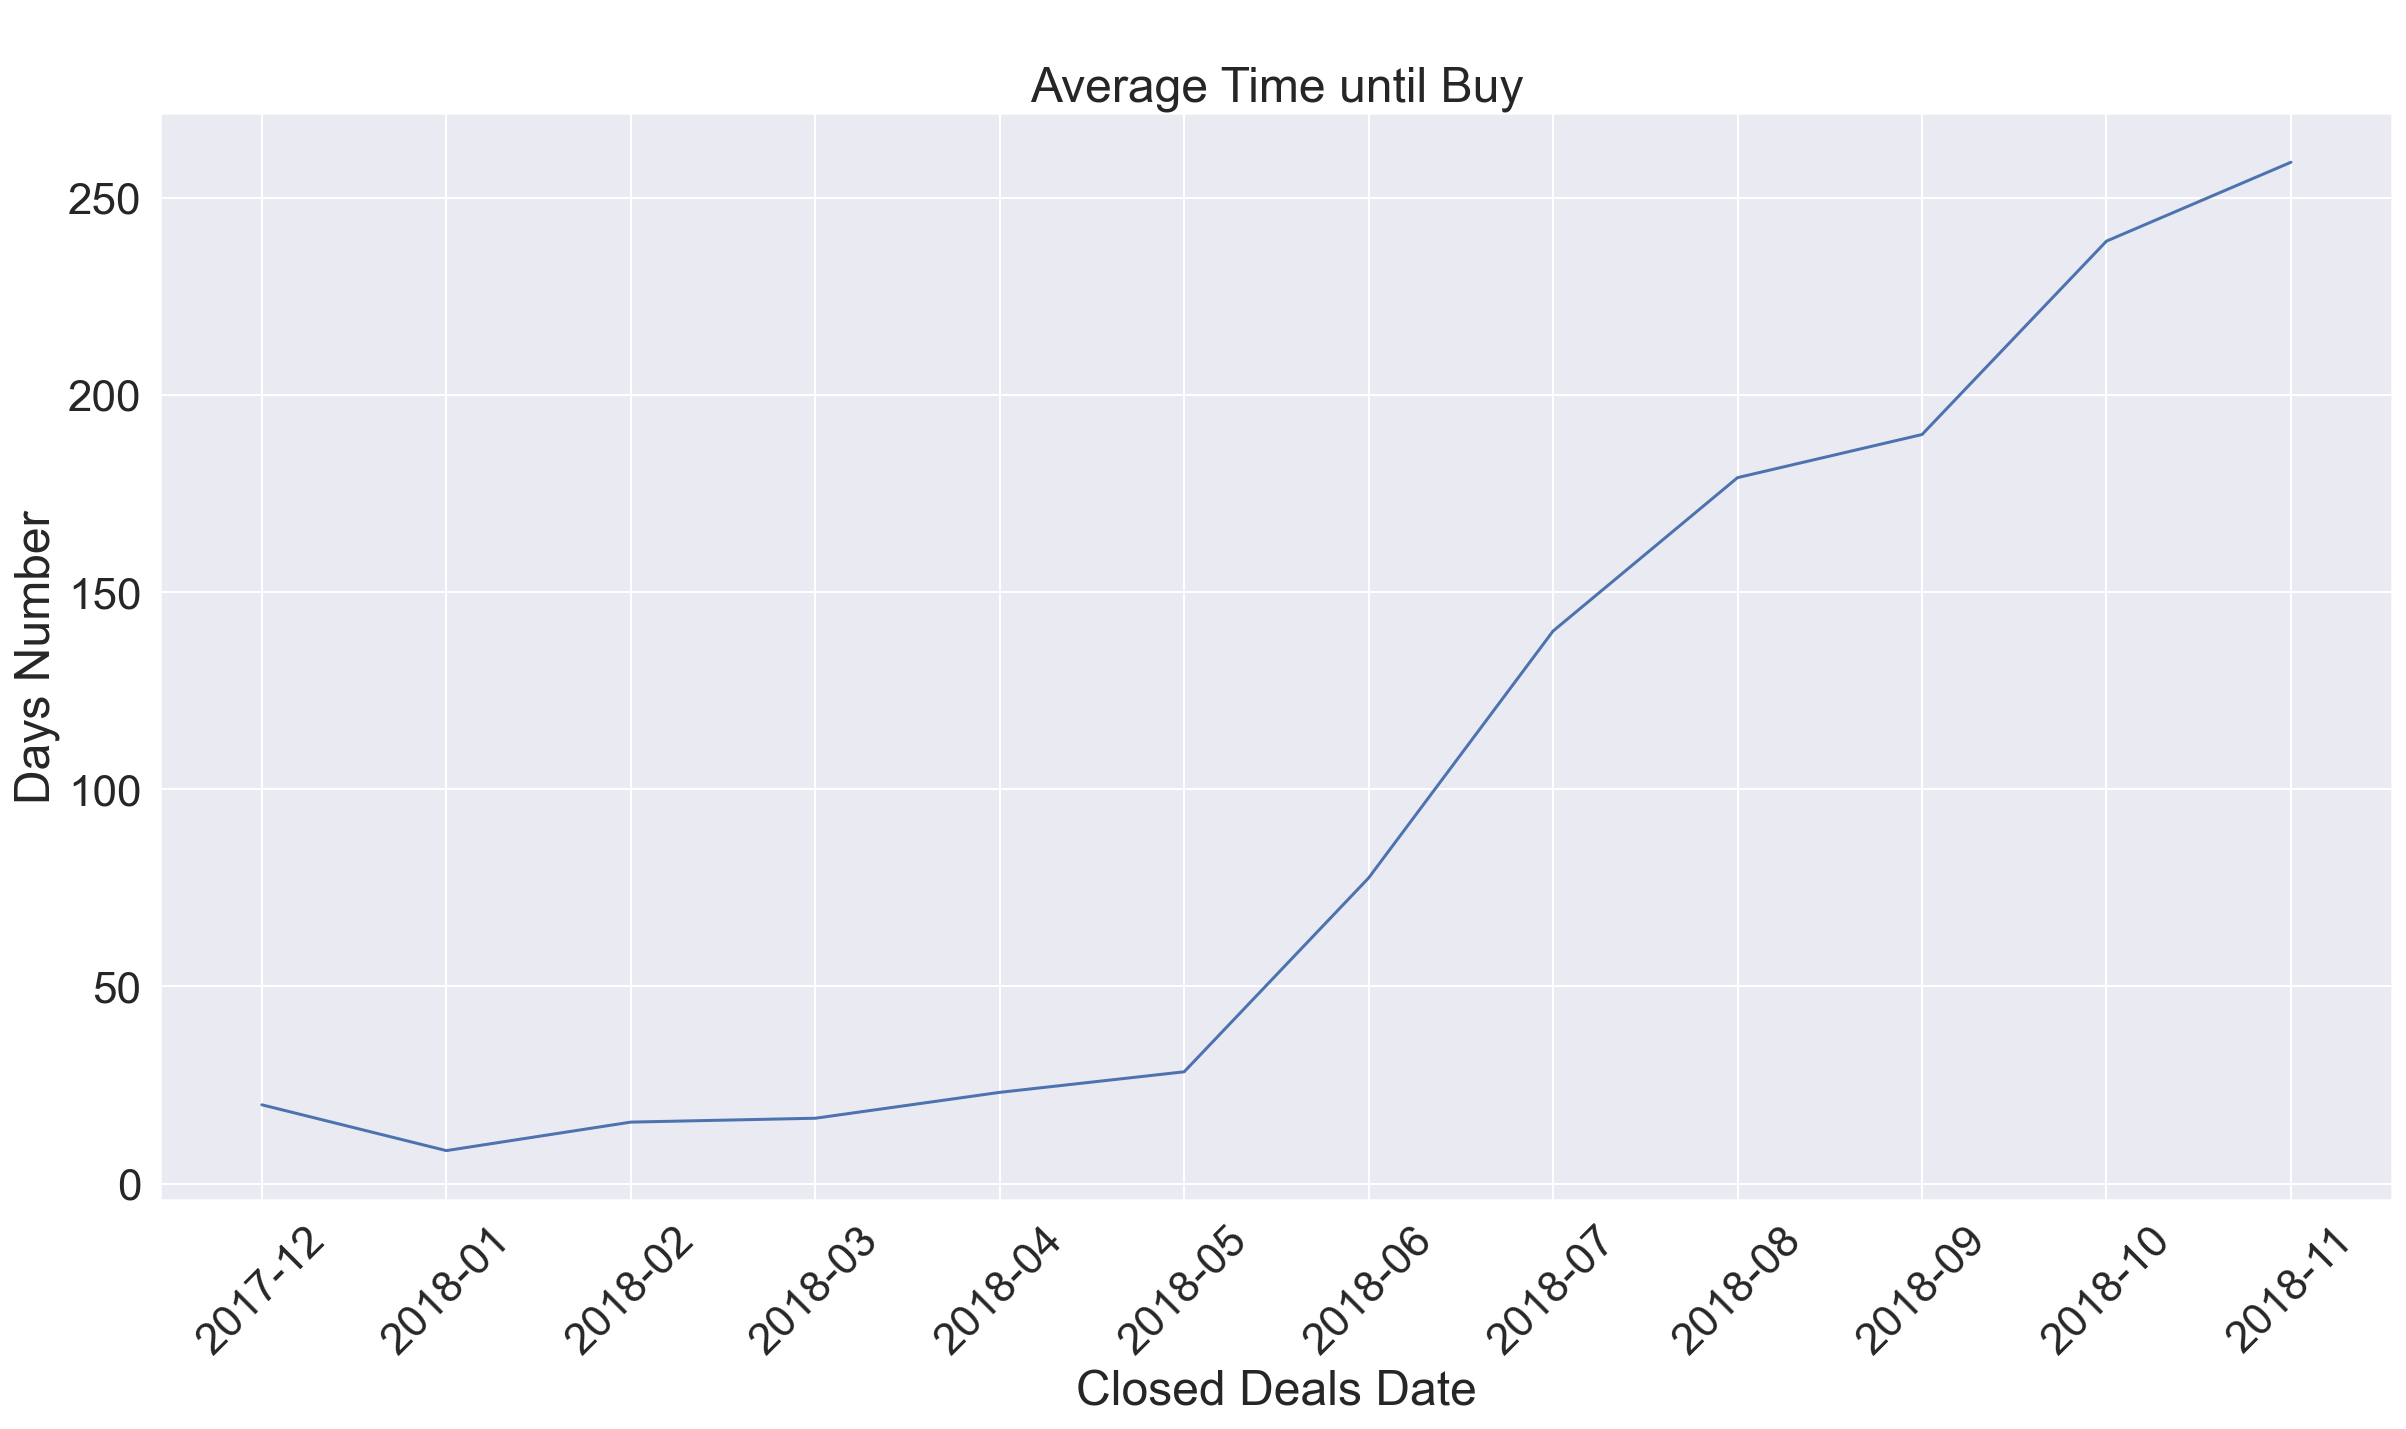

In [31]:
q5=df.groupby('won_date',as_index=False)['dif'].mean()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.ylabel("Days Number")
plt.xlabel("Closed Deals Date")

sns.lineplot(x='won_date',
             y='dif',
             data=q5).set(title='\nAverage Time until Buy');

print('\n'*2,"Average time between first sign up and buying =", round(df['dif'].mean()),'Days')

Average time between first sign up and buying = 47 Days


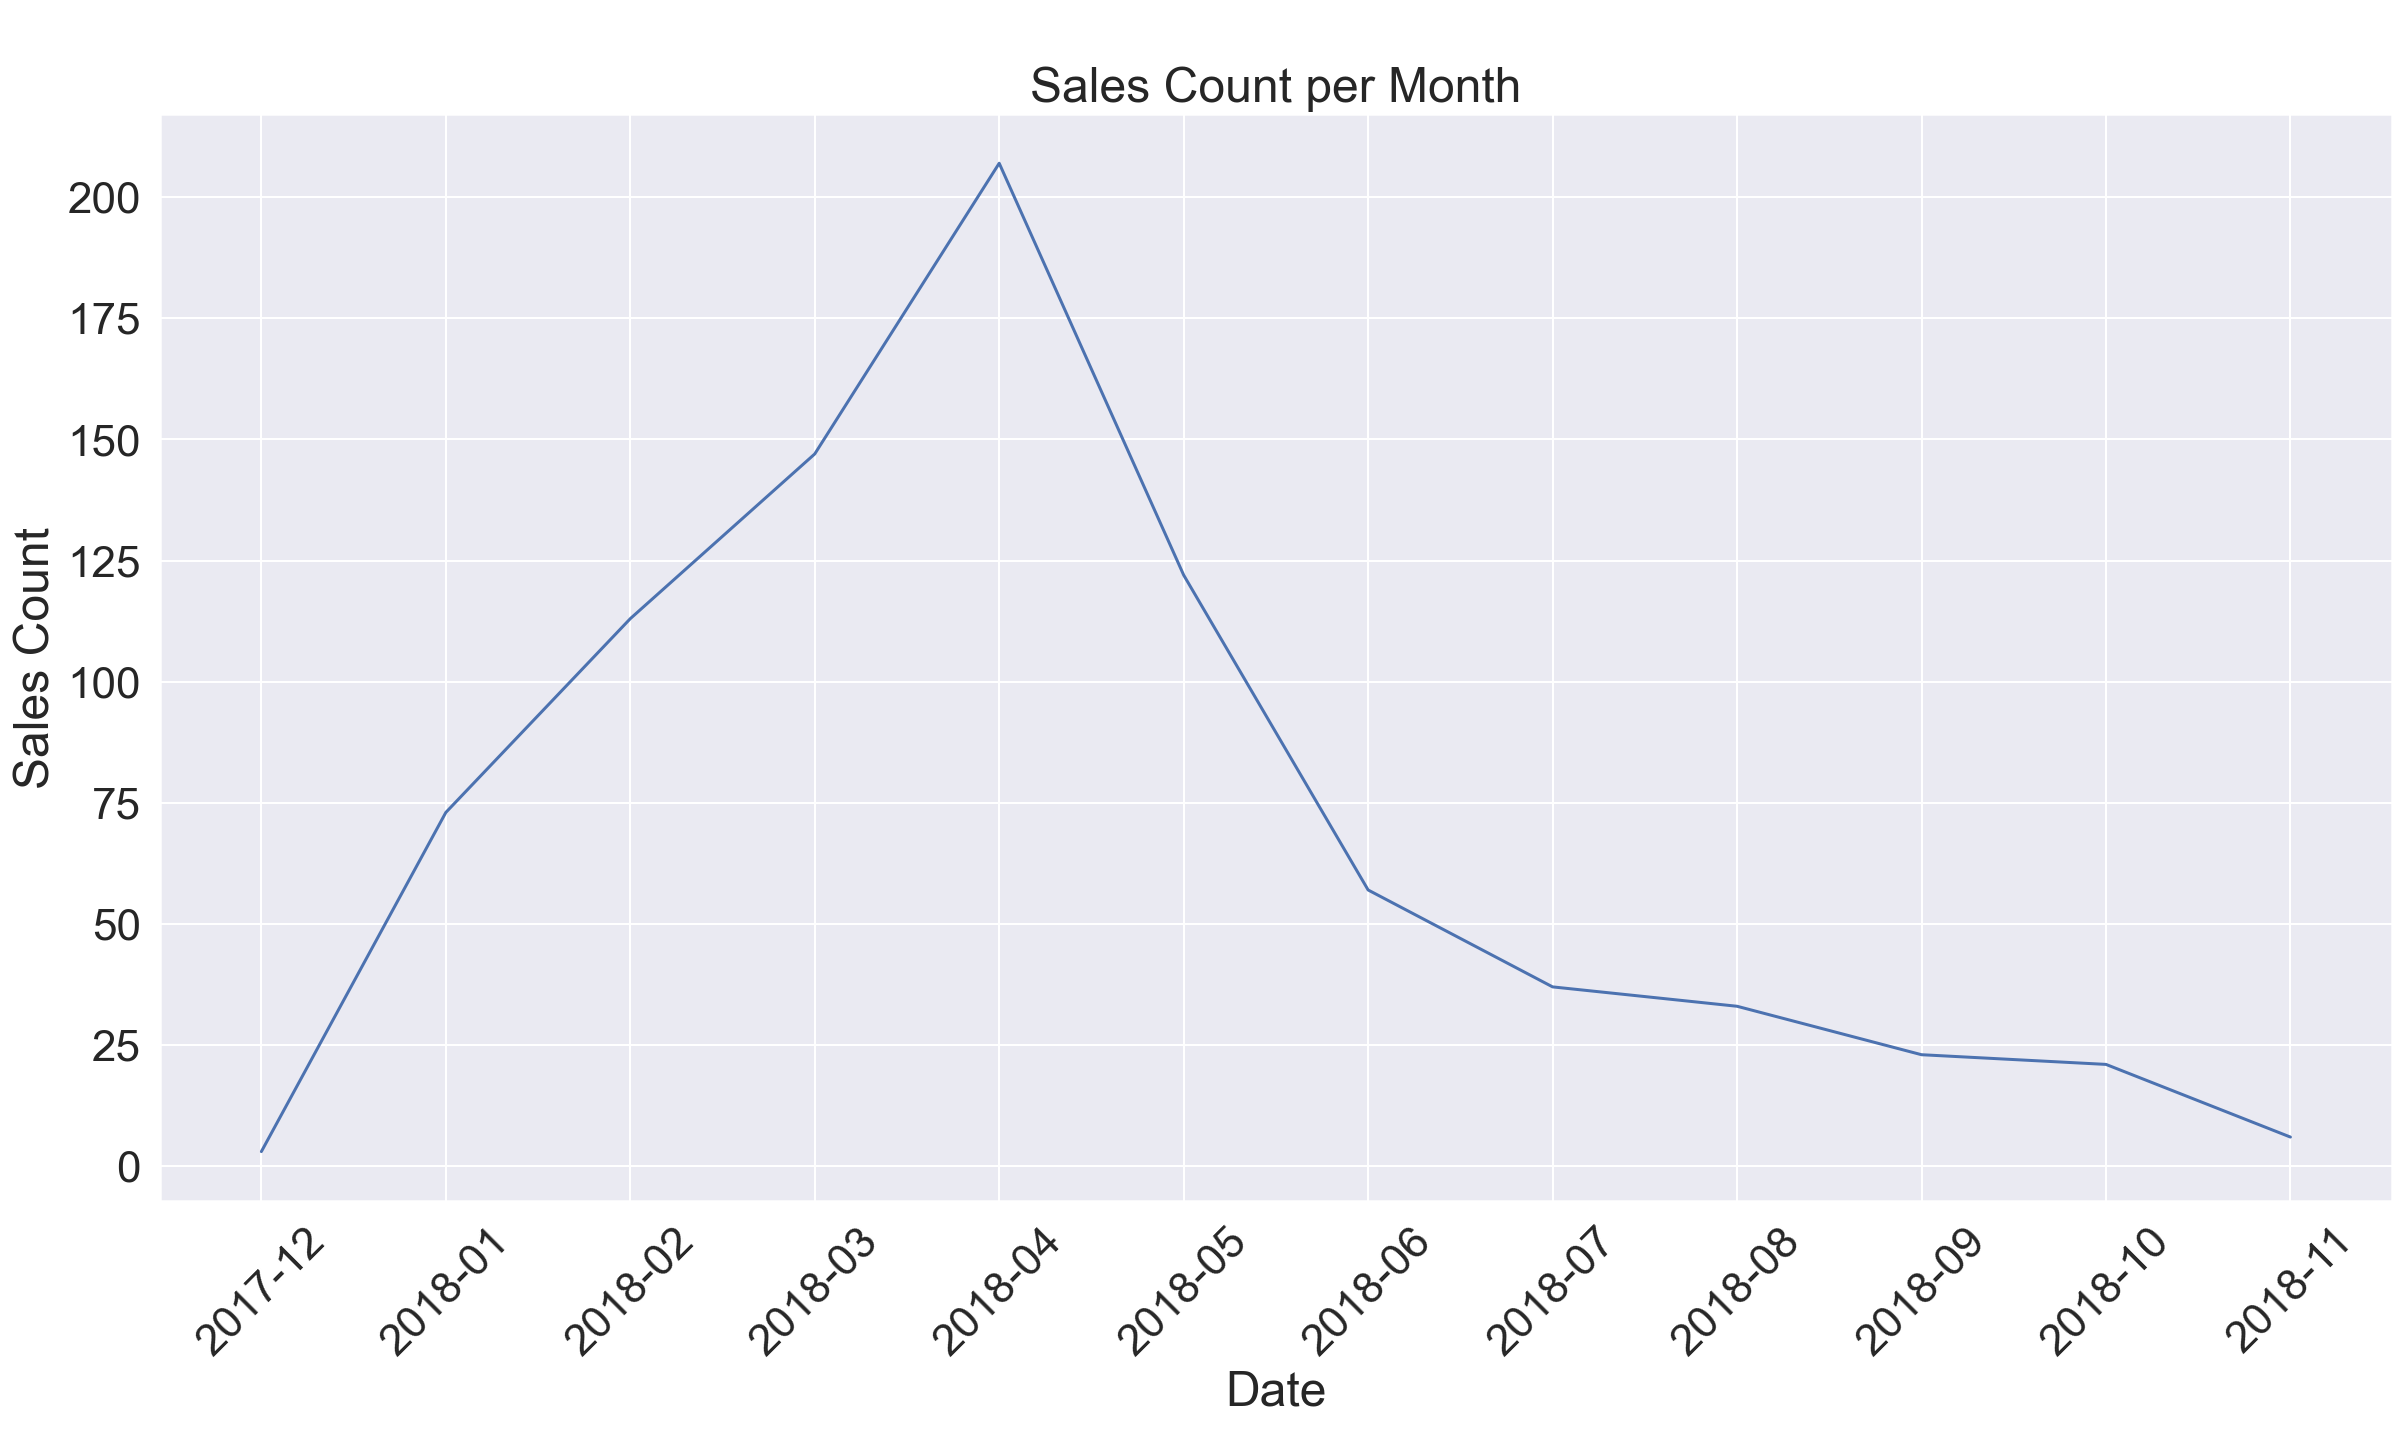

In [32]:
q6=df.groupby('won_date',as_index=False)['declared_monthly_revenue'].count()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.ylabel("Sales Count")
plt.xlabel("Date")

sns.lineplot(x='won_date',
             y='declared_monthly_revenue',
             data=q6).set(title='\nSales Count per Month');

In [33]:
# Combine four types of mixed profiles(2.4%) into 'others'
profile_list = ['cat', 'eagle', 'wolf', 'shark']

df['lead_behaviour_profile'] = df.lead_behaviour_profile \
                                                      .map(lambda profile: profile
                                                           if profile in profile_list
                                                           else 'others')
q7 = df.groupby(['lead_behaviour_profile','business_segment'],as_index=False)\
                ['declared_monthly_revenue'].count()\
                                            .sort_values(by='declared_monthly_revenue')\
                .query('lead_behaviour_profile!="Unknown" and declared_monthly_revenue!=0')

ex.bar(q7, y ='declared_monthly_revenue',x='lead_behaviour_profile',
       barmode='group',color='business_segment',title ="Business Segment For Each Lead Profile" )\
        .update_layout(title_x=0.5,font=dict(family="moon heavy"))

Final Sales Performance Overview Result:

1. Revenue is growing in the last 3 months
2. We can't make fast buyer customers because the gap between the sign-up and the closed deal is really wide last 5 month
3. Number of sales is going down in the last 7 months

### Closed Deals Performance

In [36]:
q8 = cd.groupby('business_type',as_index=False)['declared_monthly_revenue'].count()

ex.pie(q8,names='business_type',values ='declared_monthly_revenue',
       title='Who orders more ?').update_layout(
                                               title_x=0.5,
                                               font=dict(family="moon heavy",size=20,))

In [37]:
q9 = cd.groupby('business_type',as_index=False)['declared_monthly_revenue'].sum()\
            .sort_values(by='declared_monthly_revenue')

ex.bar(q9,x='business_type',y ='declared_monthly_revenue',
       title='who pays more ?').update_layout(title_x=0.5,font=dict(family="moon heavy",size=20,))

who pays more?

In [38]:
q10 = cd.groupby('business_segment',as_index=False)['declared_monthly_revenue'].sum()\
            .sort_values(by='declared_monthly_revenue').query('declared_monthly_revenue!=0')

ex.bar(q10,y='business_segment',x ='declared_monthly_revenue',
       title='Which type makes more money ?',
       log_x=True).update_layout(title_x=0.5,font=dict(family="moon heavy",size=20))

Final Closed Deal Performance Overview Result:

1. the reseller make more orders, but pay less money
2. the manufacturer make less orders, but pay more money

3. best-seller business segments:

- 1. construction_tools_house_garden
- 2. phone_mobile
- 3. home_decor
- 4. pet
- 5. health_beauty

4. low-seller business segments:

- 1. watches
- 2. food_drink
- 3. perfume
- 4. party
- 5. bed_bath_table

### Marketing Funnel and Report